# Tensorflow

## Import

In [1]:
import tensorflow as tf
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.6.0


## Load Dataset

In [2]:
mnist = tf.keras.datasets.mnist

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0; x_test = x_test / 255.0

## Build Model

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

2022-07-28 23:50:57.347085: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-28 23:50:57.347599: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro


## Make Prediction

In [19]:
predictions = model(x_train[:1]).numpy()
probabilities = tf.nn.softmax(predictions).numpy()

In [20]:
predictions

array([[ 0.838482  , -0.3446134 , -0.36457604, -0.430825  ,  0.00931004,
         0.23090892, -0.19045702,  0.16035506, -0.60645807, -0.29490703]],
      dtype=float32)

In [21]:
probabilities

array([[0.2330261 , 0.07138266, 0.06997181, 0.06548646, 0.10169503,
        0.12692258, 0.08328024, 0.1182763 , 0.05493828, 0.0750205 ]],
      dtype=float32)

## Loss Function

In [22]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [23]:
loss_fn(y_train[:1], predictions).numpy()

2.0641778

## Model Compilation

In [24]:
model.compile(
    optimizer='adam',
    loss=loss_fn,
    metrics=['accuracy']
)

## Train Model

In [25]:
model.fit(x_train, y_train, epochs=5)

2022-07-29 00:02:05.898190: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-07-29 00:02:05.902172: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-29 00:02:06.057523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2990 - accuracy: 0.9134
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1439 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1061 - accuracy: 0.9681
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0878 - accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0729 - accuracy: 0.9773


In [26]:
model.evaluate(x_test,  y_test, verbose=2)

2022-07-29 00:03:34.920907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.0752 - accuracy: 0.9780


[0.07520048320293427, 0.9780000448226929]

## Probability Model

In [27]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [28]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.41100260e-08, 2.65332201e-10, 4.95096401e-07, 2.92334407e-05,
        5.92421043e-11, 4.25797907e-07, 1.22215097e-14, 9.99942183e-01,
        4.17328359e-08, 2.75624934e-05],
       [9.71936345e-08, 1.96846668e-04, 9.99791443e-01, 7.83444102e-06,
        5.08954749e-13, 6.37407283e-08, 1.84434565e-08, 7.78923960e-15,
        3.72787713e-06, 2.06544226e-11],
       [2.53134651e-08, 9.99426246e-01, 1.13255766e-04, 1.96084784e-06,
        1.26905434e-05, 7.09001415e-06, 7.72712792e-06, 2.67044787e-04,
        1.63182092e-04, 7.62834418e-07],
       [9.99913812e-01, 7.30796090e-10, 2.94903220e-05, 1.39797764e-08,
        1.75768307e-07, 4.51280539e-06, 1.01499782e-05, 4.01021389e-05,
        1.35116887e-08, 1.68966653e-06],
       [5.38533459e-06, 7.24735871e-09, 3.65933374e-06, 1.23631011e-07,
        9.97867525e-01, 9.33565161e-07, 6.44722195e-06, 2.26934899e-05,
        5.48959747e-07, 2.09269579e-03]], dtype=float32)>

# Time-Series Forecasting

In [115]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [31]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [89]:
df = pd.read_csv(csv_path)
df = df[5::6]
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

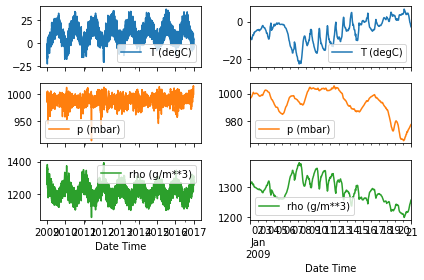

In [79]:
fig, axes = plt.subplots(3,2,sharex='col')
axes[0,0].get_shared_x_axes()
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True, ax=axes[:,0])
plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True, ax=axes[:,1])
plt.tight_layout()

## Data Cleaning

In [93]:
df['wv (m/s)'].where(df['wv (m/s)']!=-9999.0, 0.0, inplace=True)
df['max. wv (m/s)'].where(df['max. wv (m/s)']!=-9999.0, 0.0, inplace=True)

## Feature Engineering

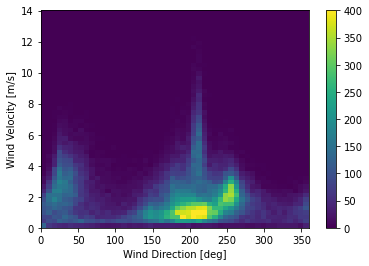

In [99]:
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50,50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')
plt.show()

### Vectorize

In [100]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# Convert to radians.
wd_rad = df.pop('wd (deg)')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

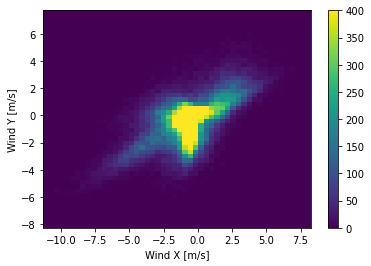

In [101]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')
plt.show()

In [105]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [108]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

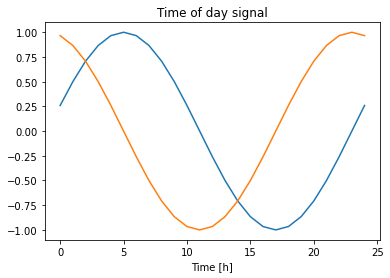

In [109]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')
plt.show()

### Fast Fourier Transform

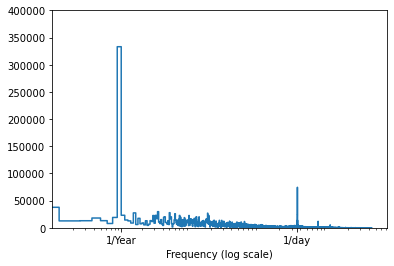

In [111]:
fft = tf.signal.rfft(df['T (degC)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['T (degC)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')
plt.show()

## Split Dataset

In [112]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

## Normalize Data

In [113]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

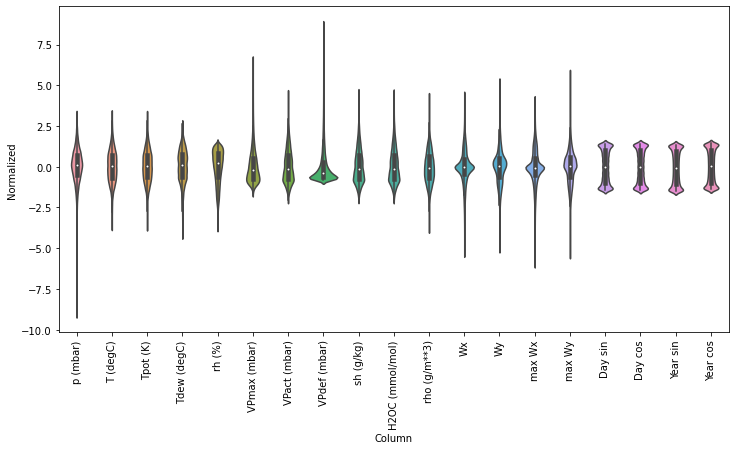

In [116]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [119]:
np.arange(10)[slice(0,None)]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Data Windowing

In [155]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift, 
                 train_df=train_df, val_df=val_df, test_df=test_df,
                 label_columns=None):
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        
        self.label_columns = label_columns
        if label_columns:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}
        
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        
        self.total_window_size = input_width + shift
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        self.label_start = self.total_window_size - self.label_width
        self.label_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.label_slice]
        
    def __repr__(self):
        return '\n'.join([
            f"Total window size: {self.total_window_size}",
            f"Input indices: {self.input_indices}",
            f"Label indices: {self.label_indices}",
            f"Label column name(s): {self.label_columns}"
        ])

In [130]:
dir(WindowGenerator)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'split_window']

In [156]:
w = WindowGenerator(input_width=6, label_width=1, shift=1, label_columns=['T (degC)'])

In [122]:
w

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['T (degC)']

In [165]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.label_slice, :]
    if self.label_columns:
        labels = tf.stack([labels[:, :, self.column_indices[name]] for name in self.label_columns], axis=-1)
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])
    return inputs, labels

WindowGenerator.split_window = split_window

In [166]:
example_window = tf.stack([np.array(train_df[:w.total_window_size]),
                           np.array(train_df[100:100+w.total_window_size]),
                           np.array(train_df[200:200+w.total_window_size])])

example_inputs, example_labels = w.split_window(example_window)

w.example = example_inputs, example_labels

In [143]:
example_labels

<tf.Tensor: shape=(3, 1, 1), dtype=float64, numpy=
array([[[-2.11187895]],

       [[-1.46022873]],

       [[-1.47871527]]])>

In [167]:
def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                      marker='X', edgecolors='k', label='Predictions',
                      c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()

    plt.xlabel('Time [h]')
    
WindowGenerator.plot = plot

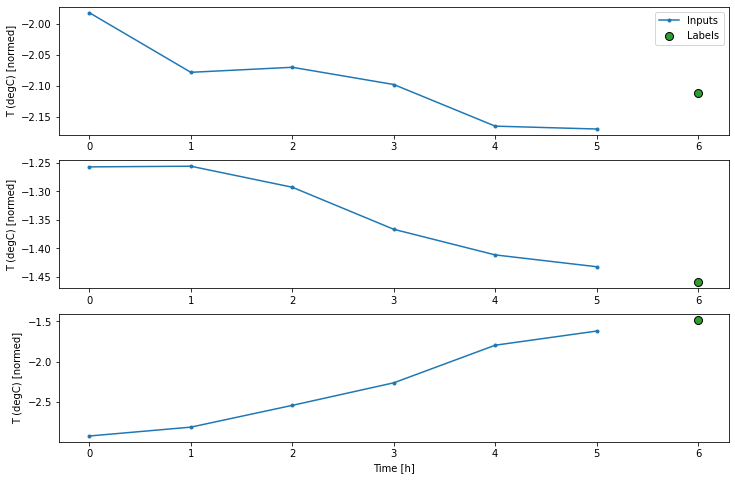

In [168]:
w.plot()

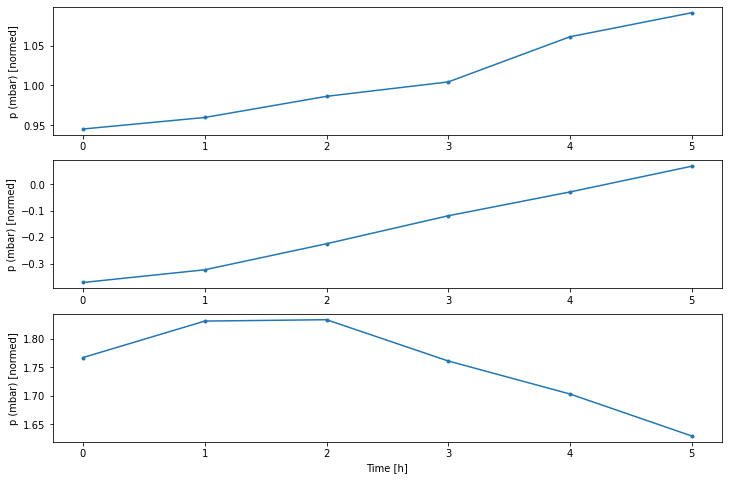

In [169]:
w.plot(plot_col='p (mbar)')

In [170]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)

    ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

In [171]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [172]:
w.train.element_spec

(TensorSpec(shape=(None, 6, 19), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [174]:
for example_inputs, example_labels in w.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 19)
Labels shape (batch, time, features): (32, 1, 1)


In [179]:
w.train.take(1)

<TakeDataset shapes: ((None, 6, 19), (None, 1, 1)), types: (tf.float32, tf.float32)>

## Baseline Model

In [183]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index
    
    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index]
        return results[:, :, tf.newaxise]